# Disease Prediction based on Symtoms

In [2]:
import joblib
import pandas as pd
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [38]:
#List of the symptoms is listed here in list l1.

l1 = [
    "itching", "skin_rash", "nodal_skin_eruptions", "continuous_sneezing", "shivering",
    "chills", "joint_pain", "stomach_pain", "acidity", "ulcers_on_tongue", "muscle_wasting",
    "vomiting", "burning_micturition", "spotting_urination", "fatigue", "weight_gain",
    "anxiety", "cold_hands_and_feets", "mood_swings", "weight_loss", "restlessness", "lethargy",
    "patches_in_throat", "irregular_sugar_level", "cough", "high_fever", "sunken_eyes",
    "breathlessness", "sweating", "dehydration", "indigestion", "headache", "yellowish_skin",
    "dark_urine", "nausea", "loss_of_appetite", "pain_behind_the_eyes", "back_pain",
    "constipation", "abdominal_pain", "diarrhoea", "mild_fever", "yellow_urine",
    "yellowing_of_eyes", "acute_liver_failure", "fluid_overload", "swelling_of_stomach",
    "swelled_lymph_nodes", "malaise", "blurred_and_distorted_vision", "phlegm",
    "throat_irritation", "redness_of_eyes", "sinus_pressure", "runny_nose", "congestion",
    "chest_pain", "weakness_in_limbs", "fast_heart_rate", "pain_during_bowel_movements",
    "pain_in_anal_region", "bloody_stool", "irritation_in_anus", "neck_pain", "dizziness",
    "cramps", "bruising", "obesity", "swollen_legs", "swollen_blood_vessels",
    "puffy_face_and_eyes", "enlarged_thyroid", "brittle_nails", "swollen_extremities",
    "excessive_hunger", "extra_marital_contacts", "drying_and_tingling_lips", "slurred_speech",
    "knee_pain", "hip_joint_pain", "muscle_weakness", "stiff_neck", "swelling_joints",
    "movement_stiffness", "spinning_movements", "loss_of_balance", "unsteadiness",
    "weakness_of_one_body_side", "loss_of_smell", "bladder_discomfort", "foul_smell_of_urine",
    "continuous_feel_of_urine", "passage_of_gases", "internal_itching", "toxic_look_(typhos)",
    "depression", "irritability", "muscle_pain", "altered_sensorium", "red_spots_over_body",
    "belly_pain", "abnormal_menstruation", "dischromic_patches", "watering_from_eyes",
    "increased_appetite", "polyuria", "family_history", "mucoid_sputum", "rusty_sputum",
    "lack_of_concentration", "visual_disturbances", "receiving_blood_transfusion",
    "receiving_unsterile_injections", "coma", "stomach_bleeding", "distention_of_abdomen",
    "history_of_alcohol_consumption", "fluid_overload.1", "blood_in_sputum",
    "prominent_veins_on_calf", "palpitations", "painful_walking", "pus_filled_pimples",
    "blackheads", "scurring", "skin_peeling", "silver_like_dusting", "small_dents_in_nails",
    "inflammatory_nails", "blister", "red_sore_around_nose", "yellow_crust_ooze"
]


len(l1)

132

In [43]:
disease=['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']

len(disease)

41

In [39]:

df=pd.read_csv("training_d.csv")

# df.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
#     'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
#     'Migraine':11,'Cervical spondylosis':12,
#     'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
#     'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
#     'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
#     'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
#     '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
#     'Impetigo':40}},inplace=True)

In [40]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [41]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [37]:
for i in df.columns:
    print(i)

itching
skin_rash
nodal_skin_eruptions
continuous_sneezing
shivering
chills
joint_pain
stomach_pain
acidity
ulcers_on_tongue
muscle_wasting
vomiting
burning_micturition
spotting_ urination
fatigue
weight_gain
anxiety
cold_hands_and_feets
mood_swings
weight_loss
restlessness
lethargy
patches_in_throat
irregular_sugar_level
cough
high_fever
sunken_eyes
breathlessness
sweating
dehydration
indigestion
headache
yellowish_skin
dark_urine
nausea
loss_of_appetite
pain_behind_the_eyes
back_pain
constipation
abdominal_pain
diarrhoea
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
malaise
blurred_and_distorted_vision
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
dizziness
cramps
bruising
obesity
swollen_legs
swollen_blood_vessels
puffy_face_and_eyes
enlarged_thyroi

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(133)
memory usage: 5.0 MB


In [14]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

<Axes: >

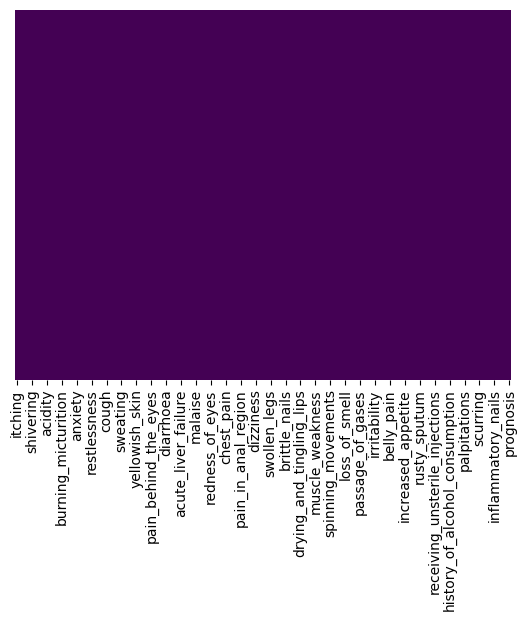

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [16]:
df.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.351936
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.079612
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.253230
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.113211
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.240568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720,0.247315
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120,0.260331
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120,0.260331
yellow_crust_ooze,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,0.946120,1.000000,0.260331


In [17]:
df['prognosis'].value_counts()

prognosis
0     120
21    120
23    120
24    120
25    120
26    120
27    120
28    120
29    120
30    120
31    120
32    120
33    120
34    120
35    120
36    120
37    120
38    120
39    120
22    120
20    120
1     120
19    120
2     120
3     120
4     120
5     120
6     120
7     120
8     120
9     120
10    120
11    120
12    120
13    120
14    120
15    120
16    120
17    120
18    120
40    120
Name: count, dtype: int64

<Axes: xlabel='prognosis', ylabel='count'>

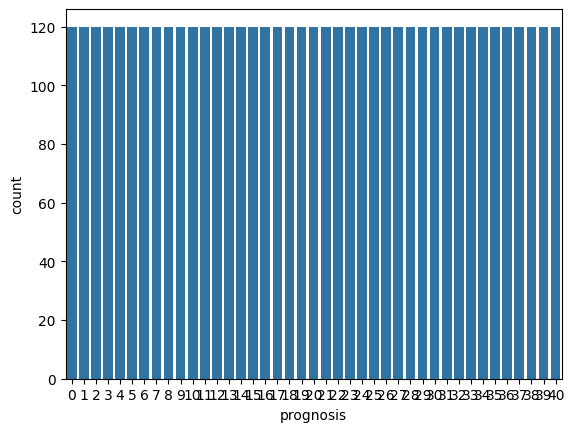

In [18]:
sns.countplot(data=df,x='prognosis')

In [19]:
X_train = df.drop('prognosis', axis=1)
y_train = df['prognosis']

In [20]:
tr=pd.read_csv("testing_d.csv")

tr.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}},inplace=True)
tr.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,2
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4


In [21]:
tr.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [22]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Columns: 133 entries, itching to prognosis
dtypes: int64(133)
memory usage: 42.7 KB


<Axes: >

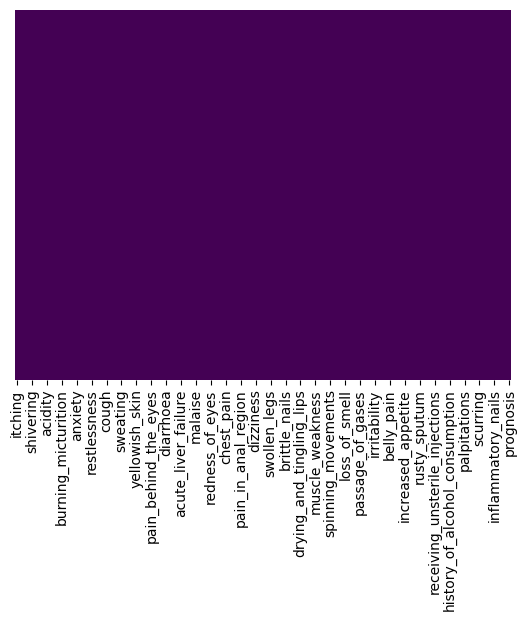

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [24]:
X_test = tr.drop('prognosis', axis=1)
y_test = tr['prognosis']

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Decision Tree Algorithm

In [26]:
clf = DecisionTreeClassifier() 
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
a_1 = accuracy_score(y_test,y_pred)
b_1 = confusion_matrix(y_test,y_pred)
c_1 = classification_report(y_test,y_pred)
print("accuracy")
print(a_1)
print("confusion_matrix")
print(b_1)
print("classification_report")
print(c_1)

accuracy
1.0
confusion_matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14     

# Random Forest Algorithm

In [27]:
clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)
a_2 = accuracy_score(y_test,y_pred2)
b_2 = confusion_matrix(y_test,y_pred2)
c_2 = classification_report(y_test,y_pred2)
print("accuracy")
print(a_2)
print("confusion_matrix")
print(b_2)
print("classification_report")
print(c_2)

accuracy
1.0
confusion_matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14     

# KNearestNeighbour Algorithm

In [28]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred3 = knn.predict(X_test)
a_3 = accuracy_score(y_test,y_pred3)
b_3 = confusion_matrix(y_test,y_pred3)
c_3 = classification_report(y_test,y_pred3)
print("accuracy")
print(a_1)
print("confusion_matrix")
print(b_3)
print("classification_report")
print(c_3)


accuracy
1.0
confusion_matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14     

# Naive Bayes Algorithm

In [29]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred4 = gnb.predict(X_test)
a_4 = accuracy_score(y_test,y_pred4)
b_4 = confusion_matrix(y_test,y_pred4)
c_4 = classification_report(y_test,y_pred4)
print("accuracy")
print(a_4)
print("confusion_matrix")
print(b_4)
print("classification_report")
print(c_4)

accuracy
1.0
confusion_matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14     

# SVC model

In [51]:
svc = SVC()
svc.fit(X_train,y_train)

y_pred5 = gnb.predict(X_test)
a_5 = accuracy_score(y_test,y_pred5)
b_5 = confusion_matrix(y_test,y_pred5)
c_5 = classification_report(y_test,y_pred5)
print("accuracy")
print(a_5)
print("confusion_matrix")
print(b_5)
print("classification_report")
print(c_5)

accuracy
1.0
confusion_matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14     

In [54]:
psymptoms = ['knee_pain']
l2 = [0]*len(l1)
for k in range(0,len(l1)):
    for z in psymptoms:
        if(z==l1[k]):
            l2[k]=1
print(len(l1))
inp = [l2]
a = clf.predict(inp)
b = clf2.predict(inp)
c = knn.predict(inp)
d = gnb.predict(inp)
e = svc.predict(inp)
print(a[0])
print(b[0])
print(c[0])
print(d[0])
print(e[0])
print(disease[a[0]])
print(disease[b[0]])
print(disease[c[0]])
print(disease[d[0]])
print(disease[e[0]])

132
34
34
6
34
0
Osteoarthristis
Osteoarthristis
AIDS
Osteoarthristis
Fungal infection


d:\Django\healthscore\Health_venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Django\healthscore\Health_venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Django\healthscore\Health_venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\Django\healthscore\Health_venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
d:\Django\healthscore\Health_venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [55]:
joblib.dump(clf2, 'diseases_rf.joblib')

['diseases_rf.joblib']

In [56]:
with open('diseases_rf.pkl', 'wb') as f:
    pickle.dump(knn, f)

In [57]:
joblib.dump(clf2, 'diseases_dt.joblib')

['diseases_dt.joblib']

In [58]:
joblib.dump(clf2, 'diseases_knn.joblib')

['diseases_knn.joblib']